# Get started with Math

### Numerical differentiation

#### Create an array of x and define the parabola function

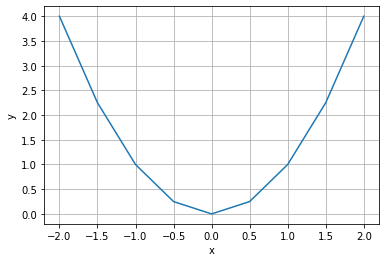

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dx = 0.5 # step length. Set a smaller value to get more points in the range and higher resolution.
x = np.arange(-2,2.5,dx) # create an array of x from -5 to 5 with step 0.5

# define a function for parabola in vertex form
def parabola(x,xv,yv,a):
    y = a*(x-xv)**2+yv
    return y

# Change parameters here
xv = 0
yv = 0
a = 1

y = parabola(x,xv,yv,a)

plt.figure(figsize=(6,4))
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

#### Define a function for calculating analytical derivative of parabola

In [14]:
# Calculate the analytical derivative of parabola in vertex form
def d_parabola(x,xv,a):
    dy_dx = 2*a*(x-xv)
    return(dy_dx)

dy_dx_acc = d_parabola(x,xv,a) # accurate derivative
print(dy_dx_acc)

[-4. -3. -2. -1.  0.  1.  2.  3.  4.]


#### Numerically estimate the derivative

[-1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5]
[-3.5 -2.5 -1.5 -0.5  0.5  1.5  2.5  3.5  4.5]
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
0.5


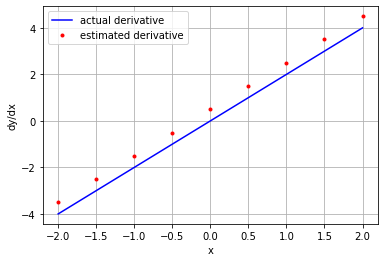

In [15]:
dx = 0.5 # set a small increment
x1 = x+dx # an array with increment
print(x1)

y1 = parabola(x1,xv,yv,a) # calculate y(x+dx)
dy_dx_est = (y1-y)/dx # estimated derivative [y(x+dx)-y(x)]/dx
print(dy_dx_est)

error = abs(dy_dx_est-dy_dx_acc) # absolute error
print(error)
error_mean = np.mean(error) # mean absolute error
print(error_mean)

plt.figure(figsize=(6,4))
plt.plot(x,dy_dx_acc,'b')
plt.plot(x,dy_dx_est,'r.')
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.legend(['actual derivative','estimated derivative'])
plt.grid()
plt.show()

#### Create a generic function for calculating numerical differentiation

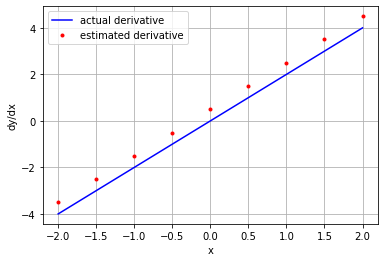

In [16]:
# Numerically estimate the derivative of a given function.
# x- input array, dx- increment, func- name of the given function, *args- all other input arguments of func except x.
# A function name can be an input argument of another function. *args are passed on to func inside the num_diff function.
def num_diff(x,dx,func,*args):
    dy_dx = (func(x+dx,*args)-func(x,*args))/dx
    return dy_dx

# In following example, func = parabola, *args = (xv,yx,a).
dy_dx_est = num_diff(x,dx,parabola,xv,yv,a) #estimated derivative

plt.figure(figsize=(6,4))
plt.plot(x,dy_dx_acc,'b')
plt.plot(x,dy_dx_est,'r.')
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.legend(['actual derivative','estimated derivative'])
plt.grid()
plt.show()

#### Calculate the numerical differential error vs. increment

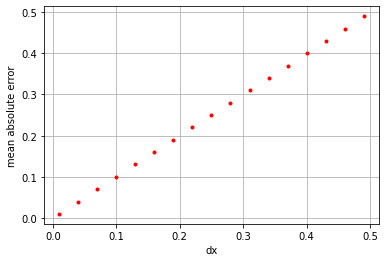

In [17]:
dx = np.arange(0.01,0.5,0.03)
err = [] # create an empty list

# loop over all elements in dx. One element from dx is assigned to h in each iteration
for h in dx:
    dy_dx_est = num_diff(x,h,parabola,xv,yv,a) # estimated derivative
    err.append( np.mean(abs(dy_dx_est-dy_dx_acc)) ) # mean absolute error calculated in each iteration is appended to the list of err

plt.figure(figsize=(6,4))
plt.plot(dx,err,'r.')
plt.xlabel('dx')
plt.ylabel('mean absolute error')
plt.grid()
plt.show()

### Numerical differentiation for sine function

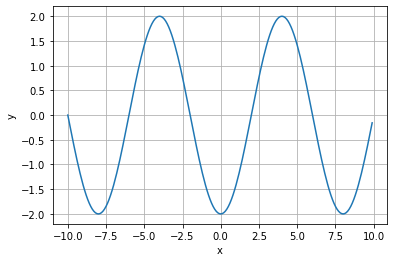

In [18]:
# define a function for sine. amp - amplitude, omega - angular speed, phi - phase
def sine(x,amp,omega,phi):
    y = amp*np.sin(omega*x+phi)
    return y

amp = 2
omega = np.pi/4
phi = -np.pi/2

x = np.arange(-10,10,0.1)
y = sine(x,amp,omega,phi)

plt.figure(figsize=(6,4))
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

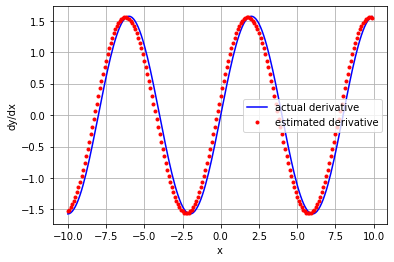

In [19]:
# Calculate the analytical derivative of sine
def d_sine(x,amp,omega,phi):
    dy_dx = amp*np.cos(omega*x+phi)*omega
    return(dy_dx)

dx = 0.5
dy_dx_acc = d_sine(x,amp,omega,phi) # accurate derivative
dy_dx_est = num_diff(x,dx,sine,amp,omega,phi) #estimated derivative

plt.figure(figsize=(6,4))
plt.plot(x,dy_dx_acc,'b')
plt.plot(x,dy_dx_est,'r.')
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.legend(['actual derivative','estimated derivative'])
plt.grid()
plt.show()

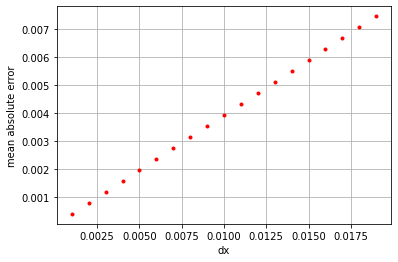

In [20]:
# Numerical differential error vs. increment
dx = np.arange(0.001,0.02,0.001)
err = [] # create an empty list

for h in dx:
    dy_dx_est = num_diff(x,h,sine,amp,omega,phi) # estimated derivative
    err.append( np.mean(abs(dy_dx_est-dy_dx_acc)) )

plt.figure(figsize=(6,4))
plt.plot(dx,err,'r.')
plt.xlabel('dx')
plt.ylabel('mean absolute error')
plt.grid()
plt.show()